## Overview

Exploratory Data Analysis of our data will be done. This will allow us to determine which factors may or may not have an impact on whether a person has Diabetes, Hypertension, and/or Stroke.

After we determine potential factors, we will then do machine learning to try and predict whether a person will have Diabetes, Hypertension, and Stroke based on the factors we have analyzed.

First we import packages for our analysis of the data and store our data in to a dataframe:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import tensorflow as tf
from scipy.stats import f_oneway
from tensorflow import keras 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder


## Uploading of our data

In [100]:
url = 'health_data.csv'
da = pd.read_csv(url)

da.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
da.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


We will then clean our data. First by finding incomplete data, then by finding duplicate data.

In [102]:
da.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [103]:
da.duplicated().sum()

6672

As we can see, there are no incomplete data in our dataset. In addition, we also see that we have 6672 duplicated rows. Although this is the case, without identification, we are not able to determine whether these rows are the same people or different people. So we will just leave the "duplicated" rows in our dataset and go on with our analysis with them.

Before we start our analysis, we need to make some assumptions about our data. The assumptions we are making is:
 * Data was collected through simple random sampling. Although this is unlikely to be the case, I am current unsure how to conduct statistics with complex samplings.
 * Population responses are approximately normal. In our case, the size of our data is 70692, so it is assumed it is normal

Now we can begin our analysis.

### AGE

Some questions we will try to answer are:
 * Does age play a role as a risk factor in developing Diabetes, Hypertension, or Stroke?
 * Is there a significant difference between the population proportion of people having one of those health problems at their age group? 


<AxesSubplot: xlabel='Age', ylabel='Count'>

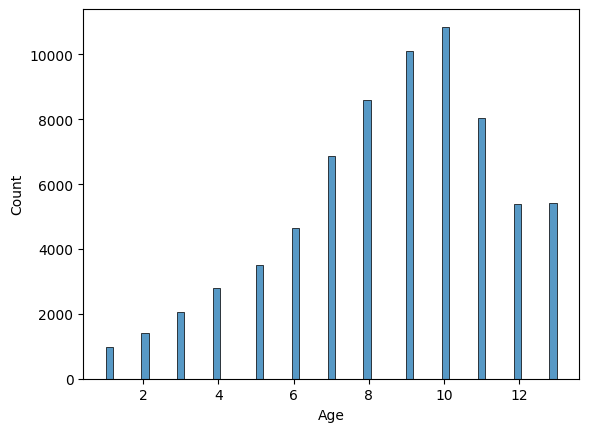

In [104]:
sns.histplot(x = 'Age', data = da)

In [105]:
da['Diabetes'] = da['Diabetes'].replace([0, 1], ['No', 'Yes'])
da['Hypertension'] = da['Hypertension'].replace([0, 1], ['No', 'Yes'])
da['Stroke'] = da['Stroke'].replace([0, 1], ['No', 'Yes'])

In [106]:
sns.histplot(x = 'Age', hue='Diabetes', multiple="dodge", data = da).set(title='Diabetics by Age')
plt.savefig('AgeDiabetes.jpg')
plt.close()



In [107]:
sns.histplot(x = 'Age', hue='Hypertension', hue_order = ['No', 'Yes'], multiple="dodge", data = da).set(title='Hypertension by Age')
plt.savefig('AgeHypertension.jpg')
plt.close()


In [108]:
sns.histplot(x = 'Age', hue='Stroke', multiple="dodge", data = da).set(title='Stroke by Age')
plt.savefig('AgeStrokes.jpg')
plt.close()


In [109]:
#Finding the Proportions.
diabetes = pd.crosstab(index=da['Age'], columns=da['Diabetes'], margins=True)
diabetes['Proportion in %'] = diabetes['Yes']/diabetes['All'] * 100
diabetes.reset_index(inplace=True)


ax = sns.barplot(data=diabetes, x= 'Age', y='Proportion in %', errwidth=0)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Proportion of Diabetics in that Age Group")
plt.savefig('AgeDiabeticProps.jpg')
plt.close()


In [110]:
hypertension = pd.crosstab(index=da['Age'], columns=da['Hypertension'], margins=True)
hypertension['Proportion in %'] = hypertension['Yes']/hypertension['All'] * 100
hypertension.reset_index(inplace=True)

ax = sns.barplot(data=hypertension, x= 'Age', y='Proportion in %', errwidth=0)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Proportion of Hypertension in that Age Group")
plt.savefig('AgeHyperProps.jpg')
plt.close()

In [111]:
stroke = pd.crosstab(index=da['Age'], columns=da['Stroke'], margins=True)
stroke['Proportion in %'] = stroke['Yes']/stroke['All'] * 100
stroke.reset_index(inplace=True)

ax = sns.barplot(data=stroke, x= 'Age', y='Proportion in %', errwidth=0)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Proportion of Stroke in that Age Group")
plt.savefig('AgeStrokeProps.jpg')
plt.close()

![](AgeDiabetes.jpg)  ![](AgeHypertension.jpg) ![](AgeStrokes.jpg)
 


## Proportions
![](AgeDiabeticProps.jpg)  ![](AgeHyperProps.jpg)  ![](AgeStrokeProps.jpg)

As we can see, as the people get older, both diabetes, hypertension, stroke increases in the age group. Both diabetes and hypertension are extremely similar when it comes to the proportion in the population in each age group. Stroke on the other hand, is much less common being at most 12% at age group 13 but the amount does increase with age albeit not as much when compared to diabetes and hypertension.

This tells us that Age might be a good predictor if a person would have diabetes, Hypertension, or Stroke. We will be using this as a input variable when we use machine learning to trying to predict if a person would have diabetes, hypertension, or a stroke.

## Sex

Some questions will we try to answer is:
 * Are there any differences between Male and Female having any of the health conditions?
 * Is there a statistical significance between the differences?

For all statistical analysis, our null hypothesis would be that there is no significant difference between the genders and having a certain disease.

In [112]:
da['Sex'] = da['Sex'].replace([0,1], ['Female','Male'])

crosstabs = pd.crosstab(index=da['Sex'], columns = da['Diabetes'], margins=True)
crosstabs['Yes-Proportion'] = crosstabs['Yes']/ crosstabs['All'] * 100
crosstabs['No-Proportion'] = crosstabs['No']/ crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Diabetes,Sex,No,Yes,All,Yes-Proportion,No-Proportion
0,Female,19975,18411,38386,47.962799,52.037201
1,Male,15371,16935,32306,52.420603,47.579397


In [113]:
daprop = sns.barplot(x='Sex', y= 'Yes-Proportion', data=crosstabs)
daprop.bar_label(daprop.containers[0], fmt='%.f%%')
plt.title("Proportion of Diabetes based on Gender")
plt.savefig('DaGenderProps.jpg')
plt.close()

![](DaGenderProps.jpg)

In [114]:
dafemale = da.loc[da['Sex'] == 'Female', "Diabetes"].replace({"Yes": 1, "No": 0})
daMale = da.loc[da['Sex'] == 'Male', "Diabetes"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(dafemale, daMale)

(-11.819972389178922, 3.3007777865381036e-32, 70690.0)

We get a test statistic of -11.82 and a P value of basically 0 for diabetics. This allows us to reject our null hypothesis, telling us there is a significant difference between the genders and having diabetes.

In [115]:
crosstabs = pd.crosstab(index=da['Sex'], columns = da['Hypertension'], margins=True)
crosstabs['Yes-Proportion'] = crosstabs['Yes']/ crosstabs['All'] * 100
crosstabs['No-Proportion'] = crosstabs['No']/ crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Hypertension,Sex,No,Yes,All,Yes-Proportion,No-Proportion
0,Female,17470,20916,38386,54.488616,45.511384
1,Male,13390,18916,32306,58.552591,41.447409


In [116]:
hyprop = sns.barplot(x='Sex', y= 'Yes-Proportion', data=crosstabs)
hyprop.bar_label(hyprop.containers[0], fmt='%.f%%')
plt.title("Proportion of Hypertension based on Gender")
plt.savefig('HyGenderProps.jpg')
plt.close()

![](HyGenderProps.jpg)

In [117]:
dafemale = da.loc[da['Sex'] == 'Female', "Hypertension"].replace({"Yes": 1, "No": 0})
daMale = da.loc[da['Sex'] == 'Male', "Hypertension"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(dafemale, daMale)

(-10.861909054161348, 1.8402651416495403e-27, 70690.0)

We get a test statistic of -10.86 and a P value of basically 0. This allows us to reject our null hypothesis, telling us there is significant difference between the genders and having hypertension.

In [118]:
crosstabs = pd.crosstab(index=da['Sex'], columns = da['Stroke'], margins=True)
crosstabs['Yes-Proportion'] = crosstabs['Yes']/ crosstabs['All'] * 100
crosstabs['No-Proportion'] = crosstabs['No']/ crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Stroke,Sex,No,Yes,All,Yes-Proportion,No-Proportion
0,Female,36032,2354,38386,6.132444,93.867556
1,Male,30265,2041,32306,6.317712,93.682288


In [119]:
Strokeprop = sns.barplot(x='Sex', y= 'Yes-Proportion', data=crosstabs)
Strokeprop.bar_label(Strokeprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of Stroke based on Gender")
plt.savefig('StrokeGenderProps.jpg')
plt.close()

![](StrokeGenderProps.jpg)

In [120]:
dafemale = da.loc[da['Sex'] == 'Female', "Stroke"].replace({"Yes": 1, "No": 0})
daMale = da.loc[da['Sex'] == 'Male', "Stroke"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(dafemale, daMale)

(-1.0162104563117815, 0.3095326561695111, 70690.0)

We get a test statistic of -1.01 and a P value of 0.31. This means that we fail to reject our null hypothesis. We conclude that there is no significant difference between the gender of the person and if they had strokes.

To summarize our finding, we see that there is sufficient evidence to conclude that there is a significant difference between gender of the person and whether they have diabetes and/or hypertension. We also see that there is there is no significant difference between the gender of the person and if they had a stroke or not.

## High Cholestrol

What is the relationship between High Cholestrol and Disease states?
Do people with diabetes, Hypertension, or stroke also have High Cholestrol? 

In [121]:
da['HighChol'] = da['HighChol'].replace([0,1], ["No", "Yes"])

crosstabs = pd.crosstab(index=da['HighChol'], columns = da['Diabetes'], margins=True)
crosstabs['Yes-Proportion'] = crosstabs['Yes']/ crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Diabetes,HighChol,No,Yes,All,Yes-Proportion
0,No,21869,11660,33529,34.775866
1,Yes,13477,23686,37163,63.735436


In [122]:
HCDprop = sns.barplot(x='HighChol', y= 'Yes-Proportion', data=crosstabs)
HCDprop.bar_label(HCDprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of diabetes based on High Cholestrol")
plt.savefig('HCDProps.jpg')
plt.close()

![](HCDProps.jpg)

In [123]:
HCY = da.loc[da['HighChol'] == 'Yes', "Diabetes"].replace({"Yes": 1, "No": 0})
HCN = da.loc[da['HighChol'] == 'No',"Diabetes"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HCY, HCN)

(80.32752925525735, 0.0, 70690.0)

With a p value of 0, we can say that there is a significant evidence between having high cholestrol and diabetes.

In [124]:
crosstabs = pd.crosstab(index=da['HighChol'], columns = da['Hypertension'], margins=True)
crosstabs['Yes-Proportion'] = crosstabs['Yes']/ crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Hypertension,HighChol,No,Yes,All,Yes-Proportion
0,No,20178,13351,33529,39.819261
1,Yes,10682,26481,37163,71.256357


In [125]:
HCHprop = sns.barplot(x='HighChol', y= 'Yes-Proportion', data=crosstabs)
HCHprop.bar_label(HCHprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of hypertension based on High Cholestrol")
plt.savefig('HCHProps.jpg')
plt.close()

![](HCHProps.jpg)

In [126]:
HCY = da.loc[da['HighChol'] == 'Yes', "Hypertension"].replace({"Yes": 1, "No": 0})
HCN = da.loc[da['HighChol'] == 'No', "Hypertension"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HCY, HCN)

(88.71471415118116, 0.0, 70690.0)

With a p value of 0, we can say that there is a significant evidence between having high cholestrol and hypertension.

In [127]:
crosstabs = pd.crosstab(index=da['HighChol'], columns = da['Stroke'], margins=True)
crosstabs['Yes-Proportion'] = crosstabs['Yes']/ crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Stroke,HighChol,No,Yes,All,Yes-Proportion
0,No,32295,1234,33529,3.680396
1,Yes,34002,3161,37163,8.505772


In [128]:
HCSprop = sns.barplot(x='HighChol', y= 'Yes-Proportion', data=crosstabs)
HCSprop.bar_label(HCSprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of strokes based on High Cholestrol")
plt.savefig('HCSprop.jpg')
plt.close()

![](HCSprop.jpg)

In [129]:
HCY = da.loc[da['HighChol'] == 'Yes', "Stroke"].replace({"Yes": 1, "No": 0})
HCN = da.loc[da['HighChol'] == 'No', "Stroke"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HCY, HCN)

(26.663826258835183, 7.342421695047231e-156, 70690.0)

With a p value of 0, we can say that there is a significant evidence between having high cholestrol and stroke.

As we can see, people with diabetes and hypertension tends to have a higher proportion of high cholestrol. 64% of people that have diabetes also has high cholestrol and 71% of people that have hypertension also has high cholestrol. Stroke also has a increased proportion of high cholestrol, but this is not as much as the other two disease. 8.5% of people that had a stroke also had high cholestrol. When we do statistical testing we see that with a significance level of 5%, the p values are all 0. This indicates that there is a significant difference between high cholestrol and the 3 diseases.

## BMI

Weight of the person can cause health issues as well. In this analysis, we will try to answer the following questions:
 * What is the average weight of people with no diabetes, hypertension, or strokes, and the average weight of people with the disease? (Average weight of diabetics, Hypertensive, and people with stroke.)
 * Is there a statistical difference between the weights of people with no disease verus the people with the disease?

In [130]:
meanBMI = da['BMI'].mean()
meanBMI

29.856985231709388

The mean BMI is 29.86 of all the people in the dataset.

In [131]:
da['Diabetes'] = da['Diabetes'].replace(['No','Yes'], [0, 1])
da['Hypertension'] = da['Hypertension'].replace(['No','Yes'], [0, 1])
da['Stroke'] = da['Stroke'].replace(['No','Yes'], [0, 1])
NoDiseaseBMI = da.loc[(da['Diabetes'] == 0) & (da['Hypertension'] == 0) & (da['Stroke'] == 0) , "BMI"]
NoDiseaseBMI.mean()

26.915797693968486

In [132]:
DiabetesBMI = da.loc[(da['Diabetes'] == 1) , "BMI"]
DiabetesBMI.mean()

31.94401063769592

In [133]:
HypertensionBMI = da.loc[(da['Hypertension'] == 1) , "BMI"]
HypertensionBMI.mean()

31.366162884113276

In [134]:
StrokeBMI = da.loc[(da['Stroke'] == 1) , "BMI"]
StrokeBMI.mean()

30.4905574516496

In [135]:
AnyProblemBMI = da.loc[(da['Diabetes'] == 1) | (da['Hypertension'] == 1) | (da['Stroke'] == 1) , "BMI"]
AnyProblemBMI.mean()

31.165709380046195

As we can see, a person with no disease has a mean BMI of 26.9 while if they have at least one of the disease, they have a mean BMI of 31.2. The average person with no disease is overweight while the average person with at least one disease is obese. This indicates that weight may be a factor in a person's disease state. To see if this difference in weight is actually important, we will see if the differences are statistically significant.

We also see that BMI is different between each disease state, with stroke being the lowest average BMI and Diabetes being the highest average BMI. Although this is the case, there may be a time where a person has multiple disease state, such as having a stroke and diabetes but no hypertension. So further analysis will need to be performed.

In [136]:
sm.stats.ztest(NoDiseaseBMI,AnyProblemBMI)

(-76.28418171001145, 0.0)

With a p-value of 0, we can reject the null hypothesis that there is no difference in the average BMI of the diseased state verus non-diseased state. This tells that there is indeed a statistical difference between the diseased state and non diseased state and that BMI could be a big factor on diseased state. Although this is the case, is there a statistical difference between the BMI of diabetes, hypertension, and strokes?

In [137]:
f_oneway(DiabetesBMI, HypertensionBMI, StrokeBMI)

F_onewayResult(statistic=109.70460449969218, pvalue=2.639142949755514e-48)

Using ANOVA one way, we see that the p-value is basically 0, allowing us to reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in BMI among the three disease states.

## Smoker


Smoking may also cause significant health problems. We will see if people with disease states are more likely to be smokers or not. What is relationship of smokers and disease states?

In [138]:
da['Diabetes'] = da['Diabetes'].replace([0, 1], ['No', 'Yes'])
da['Hypertension'] = da['Hypertension'].replace([0, 1], ['No', 'Yes'])
da['Stroke'] = da['Stroke'].replace([0, 1], ['No', 'Yes'])

In [139]:
da['Smoker'] = da['Smoker'].replace([0,1], ['No','Yes'])
crosstabs = pd.crosstab(index=da['Smoker'], columns = da['Diabetes'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Diabetes,Smoker,No,Yes,All,Yes-Prop
0,No,20065,17029,37094,45.907694
1,Yes,15281,18317,33598,54.518126


In [140]:
SDprop = sns.barplot(x='Smoker', y= 'Yes-Prop', data=crosstabs)
SDprop.bar_label(SDprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of smokers who has diabetes")
plt.savefig('SDprop.jpg')
plt.close()

![](SDprop.jpg)

In [141]:
SDY = da.loc[da['Smoker'] == 'Yes', "Diabetes"].replace({"Yes": 1, "No": 0})
SDN = da.loc[da['Smoker'] == 'No', "Diabetes"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(SDY, SDN)

(22.950077787977154, 3.9188850311045014e-116, 70690.0)

In [142]:
crosstabs = pd.crosstab(index=da['Smoker'], columns = da['Hypertension'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Hypertension,Smoker,No,Yes,All,Yes-Prop
0,No,17724,19370,37094,52.218688
1,Yes,13136,20462,33598,60.902435


In [143]:
SHprop = sns.barplot(x='Smoker', y= 'Yes-Prop', data=crosstabs)
SHprop.bar_label(SHprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of smokers who has hypertension")
plt.savefig('SHprop.jpg')
plt.close()

![](SHprop.jpg)

In [144]:
SHY = da.loc[da['Smoker'] == 'Yes', "Hypertension"].replace({"Yes": 1, "No": 0})
SHN = da.loc[da['Smoker'] == 'No', "Hypertension"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(SHY, SHN)

(23.33711955127574, 5.309186308886915e-120, 70690.0)

In [145]:
crosstabs = pd.crosstab(index=da['Smoker'], columns = da['Stroke'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Stroke,Smoker,No,Yes,All,Yes-Prop
0,No,35339,1755,37094,4.731223
1,Yes,30958,2640,33598,7.857611


In [146]:
SSprop = sns.barplot(x='Smoker', y= 'Yes-Prop', data=crosstabs)
SSprop.bar_label(SSprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of smokers who has stroke")
plt.savefig('SSprop.jpg')
plt.close()

![](SSprop.jpg)

In [147]:
SSY = da.loc[da['Smoker'] == 'Yes', "Stroke"].replace({"Yes": 1, "No": 0})
SSN = da.loc[da['Smoker'] == 'No', "Stroke"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(SSY, SSN)

(17.227158711725934, 2.2709636574136042e-66, 70690.0)

We see that smokers are about 48% of the sample. Based on this, 61% of smokers also have hypertension, 55% of smokers have diabetes, and only 8% have had a stroke. These proportions are about 3-10% lower in those of dont smoke. When we do statistiacal analysis for all three diseases, we find that p values are all 0. This tells us that we get to reject the null hypothesis for all the diseases, indicating that there is statistical relationship between both smokers and diseases. This tells us that smoking may play a role in having the disease states.

## Heart Disease

Prior heart disease or attack indicates that there were problems in a person's cardiovascular system. We want to see if they do have problems with their cardiovascular problems, would they also have other diseases, such as diabetes, hypertension, or stroke?

We expect to see that those with heart disease or attack also have hypertension since hypertension is usually the start of problems in a person's cardiovascular system.

In [148]:
da['HeartDiseaseorAttack'] = da['HeartDiseaseorAttack'].replace([0,1], ['No','Yes'])
crosstabs = pd.crosstab(index=da['HeartDiseaseorAttack'], columns = da['Diabetes'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Diabetes,HeartDiseaseorAttack,No,Yes,All,Yes-Prop
0,No,32775,27468,60243,45.595339
1,Yes,2571,7878,10449,75.394775


In [149]:
HDDprop = sns.barplot(x='HeartDiseaseorAttack', y= 'Yes-Prop', data=crosstabs)
HDDprop.bar_label(HDDprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of people with heart disease or attack who has diabetes")
plt.savefig('HDDprop.jpg')
plt.close()

![](HDDprop.jpg)

In [150]:
HDY = da.loc[da['HeartDiseaseorAttack'] == 'Yes', "Diabetes"].replace({"Yes": 1, "No": 0})
HDN = da.loc[da['HeartDiseaseorAttack'] == 'No', "Diabetes"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HDY, HDN)

(57.54096101446482, 0.0, 70690.0)

In [151]:
crosstabs = pd.crosstab(index=da['HeartDiseaseorAttack'], columns = da['Hypertension'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Hypertension,HeartDiseaseorAttack,No,Yes,All,Yes-Prop
0,No,28921,31322,60243,51.992763
1,Yes,1939,8510,10449,81.443200


In [152]:
HDHprop = sns.barplot(x='HeartDiseaseorAttack', y= 'Yes-Prop', data=crosstabs)
HDHprop.bar_label(HDHprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of people with heart disease or attack who has hypertension")
plt.savefig('HDHprop.jpg')
plt.close()

![](HDHprop.jpg)

In [153]:
HHY = da.loc[da['HeartDiseaseorAttack'] == 'Yes', "Hypertension"].replace({"Yes": 1, "No": 0})
HHN = da.loc[da['HeartDiseaseorAttack'] == 'No', "Hypertension"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HHY, HHN)

(57.32088541634224, 0.0, 70690.0)

In [154]:
da['HeartDiseaseorAttack'] = da['HeartDiseaseorAttack'].replace([0,1], ['No','Yes'])
crosstabs = pd.crosstab(index=da['HeartDiseaseorAttack'], columns = da['Stroke'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Stroke,HeartDiseaseorAttack,No,Yes,All,Yes-Prop
0,No,57851,2392,60243,3.970586
1,Yes,8446,2003,10449,19.169298


In [155]:
HDSprop = sns.barplot(x='HeartDiseaseorAttack', y= 'Yes-Prop', data=crosstabs)
HDSprop.bar_label(HDSprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of people with heart disease or attack who had a stroke")
plt.savefig('HDSprop.jpg')
plt.close()

![](HDSprop.jpg)

In [156]:
HSY = da.loc[da['HeartDiseaseorAttack'] == 'Yes', "Stroke"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['HeartDiseaseorAttack'] == 'No', "Stroke"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(60.93495753305408, 0.0, 70690.0)

As we see, if a person had prior heart disease or attack, they are more likely to have diabetes and hypertension. 75% of people who had prior heart disease or attack also have diabetes, while a staggering 81% also have hypertension. Only 19% of those with heart disease also have had a stroke. Although this is the case, 4% of people had no heart disease but had a stroke. This tells us that there may be some relationship with heart disease and strokes which can be determined with a larger population of people with heart disease or attack.

## Physical Activity

We want to see if a person who do physical activity also has a disease state. This is much harder to analyze. One potential flaw in this analysis is that we wouldn't know whether the person did physical activity to try and prevent disease states or if it is to manage the disease state. Although this is the case, we will assume that there is a mix of both, but more information needs to be collected to get proper insight.

The question we want to see is if people doing physical activities also have disease states. 

In [157]:
da['PhysActivity'] = da['PhysActivity'].replace([0,1], ['No','Yes'])
crosstabs = pd.crosstab(index=da['PhysActivity'], columns = da['Diabetes'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Diabetes,PhysActivity,No,Yes,All,Yes-Prop
0,No,7934,13059,20993,62.206450
1,Yes,27412,22287,49699,44.843961


In [158]:
PADprop = sns.barplot(x='PhysActivity', y= 'Yes-Prop', data=crosstabs)
PADprop.bar_label(PADprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of people who do physical activity who has diabetes")
plt.savefig('PADprop.jpg')
plt.close()

![](PADprop.jpg)

In [159]:
HSY = da.loc[da['PhysActivity'] == 'Yes', "Diabetes"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['PhysActivity'] == 'No', "Diabetes"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(-42.72660670000857, 0.0, 70690.0)

In [160]:
crosstabs = pd.crosstab(index=da['PhysActivity'], columns = da['Hypertension'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Hypertension,PhysActivity,No,Yes,All,Yes-Prop
0,No,6984,14009,20993,66.731768
1,Yes,23876,25823,49699,51.958792


In [161]:
PAHprop = sns.barplot(x='PhysActivity', y= 'Yes-Prop', data=crosstabs)
PAHprop.bar_label(PAHprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of people who do physical activity who has hypertension")
plt.savefig('PAHprop.jpg')
plt.close()

![](PAHprop.jpg)

In [162]:
HSY = da.loc[da['PhysActivity'] == 'Yes', "Hypertension"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['PhysActivity'] == 'No', "Hypertension"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(-36.52617130859428, 2.1559122707646487e-289, 70690.0)

In [163]:
crosstabs = pd.crosstab(index=da['PhysActivity'], columns = da['Stroke'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Stroke,PhysActivity,No,Yes,All,Yes-Prop
0,No,19064,1929,20993,9.188777
1,Yes,47233,2466,49699,4.961870


In [164]:
PASprop = sns.barplot(x='PhysActivity', y= 'Yes-Prop', data=crosstabs)
PASprop.bar_label(PASprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of people who do physical activity who has stroke")
plt.savefig('PASprop.jpg')
plt.close()

![](PASprop.jpg)

In [165]:
HSY = da.loc[da['PhysActivity'] == 'Yes', "Stroke"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['PhysActivity'] == 'No', "Stroke"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(-21.334380399604836, 1.133210389199026e-100, 70690.0)

There is a higher proportion of those who do no physical activity who also have disease states compared to those who do physical activity. This is seen in all three disease states and the differences are pretty large. In addition, when we do statistical analysis, we see that p values for all three tests are basically 0. This tells us that this there is indeed a statistical relationship between if a person does physical activity or not and whether they have the diseases. In this case, it can be said that if they do not do physical activity, they are more likely to have the diseases.

## Heavy Alcohol Consumption

In [166]:
da['HvyAlcoholConsump'] = da['HvyAlcoholConsump'].replace([0,1], ['No','Yes'])
crosstabs = pd.crosstab(index=da['HvyAlcoholConsump'], columns = da['Diabetes'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Diabetes,HvyAlcoholConsump,No,Yes,All,Yes-Prop
0,No,33158,34514,67672,51.001891
1,Yes,2188,832,3020,27.549669


In [167]:
HADprop = sns.barplot(x='HvyAlcoholConsump', y= 'Yes-Prop', data=crosstabs)
HADprop.bar_label(HADprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of Heavy Alcohol Consumption with diabetes")
plt.savefig('HADprop.jpg')
plt.close()

![](HADprop.jpg)

In [168]:
HSY = da.loc[da['HvyAlcoholConsump'] == 'Yes', "Diabetes"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['HvyAlcoholConsump'] == 'No', "Diabetes"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(-25.33338621951967, 5.854500651121494e-141, 70690.0)

In [169]:
crosstabs = pd.crosstab(index=da['HvyAlcoholConsump'], columns = da['Hypertension'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Hypertension,HvyAlcoholConsump,No,Yes,All,Yes-Prop
0,No,29350,38322,67672,56.629034
1,Yes,1510,1510,3020,50.000000


In [170]:
HAHprop = sns.barplot(x='HvyAlcoholConsump', y= 'Yes-Prop', data=crosstabs)
HAHprop.bar_label(HAHprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of Heavy Alcohol Consumption with Hypertension")
plt.savefig('HAHprop.jpg')
plt.close()

![](HAHprop.jpg)

In [171]:
HSY = da.loc[da['HvyAlcoholConsump'] == 'Yes', "Hypertension"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['HvyAlcoholConsump'] == 'No', "Hypertension"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(-7.189222370872304, 6.580343107954364e-13, 70690.0)

In [172]:
crosstabs = pd.crosstab(index=da['HvyAlcoholConsump'], columns = da['Stroke'], margins=True)
crosstabs['Yes-Prop'] = crosstabs['Yes'] / crosstabs['All'] * 100
crosstabs = crosstabs.drop('All')
crosstabs.reset_index(inplace=True)
crosstabs

Stroke,HvyAlcoholConsump,No,Yes,All,Yes-Prop
0,No,63384,4288,67672,6.336446
1,Yes,2913,107,3020,3.543046


In [173]:
HASprop = sns.barplot(x='HvyAlcoholConsump', y= 'Yes-Prop', data=crosstabs)
HASprop.bar_label(HASprop.containers[0], fmt='%.2f%%')
plt.title("Proportion of Heavy Alcohol Consumption with Stroke")
plt.savefig('HASprop.jpg')
plt.close()

![](HASprop.jpg)

In [174]:
HSY = da.loc[da['HvyAlcoholConsump'] == 'Yes', "Stroke"].replace({"Yes": 1, "No": 0})
HSN = da.loc[da['HvyAlcoholConsump'] == 'No', "Stroke"].replace({"Yes": 1, "No": 0})

sm.stats.ttest_ind(HSY, HSN)

(-6.221750655059861, 4.943831774163434e-10, 70690.0)

Not many people are heavy consumers of alcohol. Among the people who are heavy drinkers, the amount of people who have diseases are much less than those who are not heavy drinkers. Using what I learned with my biology degree, this doesn't seem correct. There may be a couple reasons for this observation. One reason is that these heavy alcohol consumers wouldn't be willing to complete this survey. This would mean the population of heavy alcohol consumers is shown in this dataset. Another reason may be that heavy alcohol consumers dies much earlier due to their alcohol consumption. This reason is less likely and would need further proof to prove. 

Overall, I see that heavy alcohol consumption would not be great in this analysis or in the predictability.

## Indepth Analysis


Gender and Age, Diabetes and Hypertension effects on Stroke,

## Analysis Overview

Overall, we analyzed the different behavioral risk factors of people with different disease states. We found that
 * The proportion of the people who had diabetes, hypertension, or stroke increased as the age groups increased (Age increased), with the highest being in the 12th age group.
 * Males tended to have diabetes and hypertension slightly more than females. This was not the case for strokes as both males and females had equal proportions of people who had strokes.
 * The population who had high cholestrol also had a high chance of having Diabetes and Hypertension while having an increased chance of having stroke.
 * The average BMI of those with disease was 31 while those without disease was 27. This shows that people who are obese tends to have one of the diseases. We also find that there exists a difference in the BMI among the three disease states.
 * Smokers are more likely to have disease states with the exception of strokes.
 * People with prior heart disease or attack generally diabetes and hypertension, with an increased proportion of strokes in their sample population. 
 * People with no physical activity are very likely to have disease states.


Although we were able to find these insights, it is important to note that these oberservations are part what is obsevered not causation or result of disease state. We are not able to prove that being obese will lead having diabetes or hypertension nor can we say having hypertension will make you obese. Another important thing to note is that the dataset was obtain through surveying. This can have an impact on our data, making it not as accurate as the population. People may state a lower BMI or other factors to make themselves look better. 

We also see that the proportion of strokes are much lower compared to diabetics and hypertensive people. This may be due to the lack of stroke surviors. A lot of people who had stroke die within a few years of having strokes. This is not the case for diabetes and hypertension as these are not as deadly as strokes and have much more resources to help them.


# Machine Learning

Using the information we gained, we want to see whether we can accurately predict whether a person has diabetes, hypertension, or stroke. We will use Decision Tree to help us predict our disease states. This is because decision trees are easy to understand and interpret and does not take long. We will also test different algorithms as well such as XGBoost and RandomForest to see which gives us the better accuracies.

In [175]:
da = pd.read_csv(url)

In [176]:
inputs = da[['Age',	'Sex','HighChol','BMI',	'Smoker','HeartDiseaseorAttack','PhysActivity', 'CholCheck', 'Fruits', 'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']]
# Using the 8 behavior risk factors gives the same accuracy as using all the factors.
inputs.head()

,Age,Sex,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,CholCheck,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk
0,4.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,5.0,30.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0
2,13.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0,0.0
3,11.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0
4,8.0,0.0,0.0,29.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0


In [177]:
outputs = da['Diabetes']
htoutputs = da['Hypertension']
strokeoutputs = da['Stroke']

## Diabetes


In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, outputs, test_size =.3, random_state=42
)

In [179]:
pipe_DT = Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=9))])
pipe_DT.fit(X_train, y_train)
tr_pred_dtc = pipe_DT.predict(X_train)
ts_pred_dtc = pipe_DT.predict(X_test)

In [180]:
print("training accuracy is:",accuracy_score(y_train,tr_pred_dtc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_dtc))
print(pipe_DT.score(X_test, y_test))

training accuracy is: 0.7514550157626707
testing accuracy is: 0.7388249717087891
0.7388249717087891


In [181]:
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)
tr_pred_rfc = model_rfc.predict(X_train)
ts_pred_rfc = model_rfc.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rfc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rfc))
print(model_rfc.score(X_test, y_test))

training accuracy is: 0.9574812060463989
testing accuracy is: 0.7179837797057714
0.7179837797057714


In [182]:
xgb = XGBClassifier(random_state = 42)
model_xbg = xgb.fit(X_train, y_train)
tr_pred_xbg = model_xbg.predict(X_train)
ts_pred_xbg = model_xbg.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_xbg))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_xbg))
print(model_xbg.score(X_test, y_test))

training accuracy is: 0.7726335785304341
testing accuracy is: 0.7412297246322143
0.7412297246322143


XGBoost gives us the best result for prediciting people with diabetes when testing. Although this is the case, it seems that all of our trees give similar results being in the 73-75% accuracy range. This is a pretty good rate of accuracy since diabetes is an extremely common disease in the United States with 1/10 Americans having it(CDC). With it being common, the factors surrounding a diabetic person may be extremely varied from person to person. With more behavior risk factors more geared towards diabetes, models for diabetes can be more accurate.

## Hypertension

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, htoutputs, test_size =.3, random_state=42
)
HypT_dt = DecisionTreeClassifier(max_depth=9)
HypT_dt.fit(X_train, y_train)
tr_pred_dtc = HypT_dt.predict(X_train)
ts_pred_dtc = HypT_dt.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_dtc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_dtc))
print(HypT_dt.score(X_test, y_test))


training accuracy is: 0.7465241290113976
testing accuracy is: 0.7200584685024519
0.7200584685024519


In [184]:
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)
tr_pred_rfc = model_rfc.predict(X_train)
ts_pred_rfc = model_rfc.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rfc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rfc))
print(model_rfc.score(X_test, y_test))

training accuracy is: 0.9529140732357934
testing accuracy is: 0.702093549603923
0.702093549603923


In [185]:
xgb = XGBClassifier(random_state = 42)
model_xbg = xgb.fit(X_train, y_train)
tr_pred_xbg = model_xbg.predict(X_train)
ts_pred_xbg = model_xbg.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_xbg))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_xbg))
print(model_xbg.score(X_test, y_test))

training accuracy is: 0.7681068628243473
testing accuracy is: 0.7281686156167484
0.7281686156167484


Random Forest gives us the best training accuracy with a 95.6% but XGBoost gives us the best testing accuracy at 72.8%. All the algorithms gives similar results for testing accuracy at a 70-73% range. This range is a pretty good range since, just like diabetes, hypertension is a very common in the United States with over half of all Americans having it (CDC). With more behavior risk factors geared towards hypertension, predictive models can become more accurate.

## Stroke

In [186]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, strokeoutputs, test_size =.3, random_state=42
)
Stroke_dt = DecisionTreeClassifier(max_depth=9)
Stroke_dt.fit(X_train, y_train)
tr_pred_dtc = HypT_dt.predict(X_train)
ts_pred_dtc = HypT_dt.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_dtc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_dtc))
print(HypT_dt.score(X_test, y_test))

training accuracy is: 0.4148613693315011
testing accuracy is: 0.41097698981516406
0.41097698981516406


In [187]:
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)
tr_pred_rfc = model_rfc.predict(X_train)
ts_pred_rfc = model_rfc.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rfc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rfc))
print(model_rfc.score(X_test, y_test))

training accuracy is: 0.9938566001131679
testing accuracy is: 0.9315824217276499
0.9315824217276499


In [188]:
xgb = XGBClassifier(random_state = 42)
model_xbg = xgb.fit(X_train, y_train)
tr_pred_xbg = model_xbg.predict(X_train)
ts_pred_xbg = model_xbg.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_xbg))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_xbg))
print(model_xbg.score(X_test, y_test))

training accuracy is: 0.9444264812868806
testing accuracy is: 0.9359204073934364
0.9359204073934364


In [189]:
x = da.join(pd.DataFrame(model_xbg.predict(inputs), columns=['predicited']))[['Stroke','predicited']]
x.sum()

Stroke        4395.0
predicited     458.0
dtype: float64

We see that Random Forest and XGBoost both do much better then Descision Tree with both having 93% accuracy compared to Decision Tree's 41%. Although this is the case, this might be due to the rarity of strokes. If most people never had strokes, then the model guessing no one has strokes would have high accuracy. I believe this is due to underrepesentation of Strokes in our data, something diabetes and hypertension does not have. If we got more data on the behavior risks of strokes, then we can build a very accurate model in predicitng strokes.

To see if performance of our model can be improved, we will attempt to change the data. One idea is to label the BMI's as overweight, obese, normal, or underweight and then using one hot encoding. This will cut down the variability of our data, thus may help increase performance of our model. We will also change the day varaibles for our physical health and mental health into weeks. This will allow us to be more general. There wouldnt be a difference between one or two days. For this reason we will change it into weeks.

In addition, we will decrease the age groups. As of now we have 13 age groups. We attempt to lower this based on some criteras. One criteras if change it based on generations. This will give us wider groups. It may also allow us to see if theres patterns in the generations. Another would be changing the age group to fit 10 ages instead of the current 5.

In [190]:
weight = [] 
for x in da['BMI']: #Changing BMI into CDC classifications
    if x < 18.5:
        weight.append('Underweight')
    elif x < 25:
        weight.append('Healthy')
    elif x < 30:
        weight.append('Overweight')
    else:
        weight.append('Obese')

da['weight'] = weight

physhlth = []
for x in da['PhysHlth']: # Changing PhysHlth into Weeks
    if x < 7:
        physhlth.append(1)
    elif x < 14: 
        physhlth.append(2)
    elif x < 21:
        physhlth.append(3)
    else:
        physhlth.append(4)
da['PhysHlthWeek'] = physhlth

In [191]:
mentalhealth = []
for x in da['MentHlth']: # Changing MentHlth into Weeks
    if x < 7:
        mentalhealth.append(1)
    elif x < 14: 
        mentalhealth.append(2)
    elif x < 21:
        mentalhealth.append(3)
    else:
        mentalhealth.append(4)
da['MentalHealth'] = mentalhealth

In [192]:
# Changing Age group into generations: Age group 1 is from 18-24. Taken from 2015. 4 generations: Traditionalist(12-13), Baby Boomers (7-11), Gen X (5-6), Gen Y/Milennials (1-4)
# Testing showed generation grouping performed worse then the original
Generation = []
for x in da['Age']:
    if x < 5:
        Generation.append('GenY')
    elif x < 7:
        Generation.append('GenX')
    elif x < 12:
        Generation.append('Baby Boomers')
    else:
        Generation.append('Traditionalist')

da['Generation'] = Generation

AgeGroup = []
for x in da['Age']:
    if x < 3:
        AgeGroup.append(1)
    elif x < 5:
        AgeGroup.append(2)
    elif x < 7: 
        AgeGroup.append(3)
    elif x < 9:
        AgeGroup.append(4)
    elif x < 11: 
        AgeGroup.append(5)
    else:
        AgeGroup.append(6)

da['AgeGroup'] = AgeGroup



In [193]:
da

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke,weight,PhysHlthWeek,MentalHealth,Generation,AgeGroup
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,...,30.0,0.0,0.0,1.0,0.0,Overweight,4,1,GenY,2
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,Overweight,1,1,Traditionalist,6
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,...,10.0,0.0,0.0,0.0,0.0,Overweight,2,1,Traditionalist,6
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,...,3.0,0.0,0.0,1.0,0.0,Overweight,1,1,Baby Boomers,6
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,Overweight,1,1,Baby Boomers,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,Obese,1,1,GenX,3
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,Overweight,1,1,Baby Boomers,5
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,Overweight,1,3,Traditionalist,6
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,Underweight,1,1,Baby Boomers,6


In [194]:
inputs = da[['Generation',	'Sex','HighChol','weight','Smoker','HeartDiseaseorAttack','PhysActivity', 'CholCheck', 'Fruits', 'Veggies', 'GenHlth', 'MentalHealth', 'PhysHlthWeek', 'DiffWalk']]
# Using the 8 behavior risk factors gives the same accuracy as using all the factors. Stroke inputs would include diabetes and hypertension since both are risk factors for stroke.
inputs.head()

,Generation,Sex,HighChol,weight,Smoker,HeartDiseaseorAttack,PhysActivity,CholCheck,Fruits,Veggies,GenHlth,MentalHealth,PhysHlthWeek,DiffWalk
0,GenY,1.0,0.0,Overweight,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1,4,0.0
1,Traditionalist,1.0,1.0,Overweight,1.0,0.0,0.0,1.0,1.0,0.0,3.0,1,1,0.0
2,Traditionalist,1.0,0.0,Overweight,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,2,0.0
3,Baby Boomers,1.0,1.0,Overweight,1.0,0.0,1.0,1.0,1.0,1.0,3.0,1,1,0.0
4,Baby Boomers,0.0,0.0,Overweight,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1,1,0.0


In [195]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, outputs, test_size =.3, random_state=42
)

In [196]:
pipe_ohe_XG = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore')),
    ('XG',XGBClassifier(random_state = 42))])
pipe_ohe_XG.fit(X_train, y_train)
tr_pred_dtc = pipe_ohe_XG.predict(X_train)
ts_pred_dtc = pipe_ohe_XG.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_dtc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_dtc))
print(pipe_ohe_XG.score(X_test, y_test))

training accuracy is: 0.7578207097243553
testing accuracy is: 0.7356186344775556
0.7356186344775556


The training and testing accuracy was marginally lowered when the data was manipulated to run easier. It is about a 1% decrease for both accuracy across the three diseases. This tells us that manipulation of data does not impact our model much at all. Although this is the case, we can be certain about the impacts on the model if we were able to get the data from the BRFSS in the recent years. This can help us accurately assess our model's performance in practice.